# Welcome to lab_similarity!

We are half way done with Data Science DISCOVERY this semester!! Hopefully at this point, you've come to know a few things about your groupmates in your lab section through working together on the labs. But, have you ever wondered if there is someone very similar to you in the class that you haven't had the chance to get to know yet? In this lab you will find your in-class doppelganger or your "Stat 107 Twin". With the power of data science, you'll learn more about your peers than ever before by anaylzing the `Hello` dataset!

To do this, you will:
- Use Python to work with categorical and numeric data
- Practice using conditionals in if-statements
- Design and implement your own functions

## Part 0: Your Group!
Edit the next Python cell to add information about who you're working within your lab section:

In [1]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Paul"
ca1_name = "Jesse"
ca2_name = "Charlie"


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = "Meg"
partner1_netid = "mli224"
partner1_major = "stat+cs"

partner2_name = "Abhi"
partner2_netid = "athanvi2"
partner2_major = "stat+cs"

partner3_name = ""
partner3_netid = ""
partner3_major = ""

## Part 1: Dataframe Setup

For the first part of our lab, we'll be using the "Hello" dataset one more time. We need to:
- Import the proper libraries
- Check a few rows in the dataframe
- Check if the dataframe has any blank responses

### Puzzle 1.1: Import libraries and data

Import everything you need for the lab. We will need `pandas` (as `pd`) and `matplotlib.pyplot` (as `plt`). For now, we'll only need pandas!  As in past labs, `hello.csv` should be in the same directory as this lab. Load it onto a dataframe called `df`.  Then, randomly sample and print 5 rows from the dataframe to see what our data looks like.

In [2]:
# Import pandas
import pandas as pd

# Load the dataframe and print out 5 random rows!
df = pd.read_csv("hello.csv")
df.sample(5)

,Name,Major,Year,Phone,Computer,Holes In Straw,Dogs,Cats,Fish,Chickens,...,Twitch,Have you ever programmed before?,What background in Python programming do you have?,Statistics Courses,Study Hours Per Week,Siblings,Sleep Hours,Shoe Number,How many different people (including each person in group chats!) did you text yesterday?,"Introvert, extrovert, ambivert?"
242,Eeshan,Statistics & Computer Science,Freshman,iPhone,Windows-based computer,1.0,1,0,0,0,...,0,Yes,Some Python -- I have had one class or written...,0.0,4.0,1,8.0,3.0,8.0,Introvert
34,Patrick,Statistics and Computer Science,Freshman,Android,Windows-based computer,1.0,0,0,0,0,...,1,Yes,Some Python -- I have had one class or written...,1.0,3.5,1,7.5,3.0,5.0,Introvert
244,Olivia,Statistics,Freshman,iPhone,Mac OS X-based computer,1.0,1,0,0,0,...,0,No,No programming background -- is Python Taylor ...,1.0,3.0,0,8.0,14.0,40.0,Extrovert
67,Kevin,CS,Freshman,iPhone,Mac OS X-based computer,2.0,0,0,0,0,...,0,Yes,"No Python, but I've done some programming in o...",1.0,5.0,1,6.0,3.0,2.0,Introvert
226,Rahul,CS + Stats,Freshman,iPhone,Mac OS X-based computer,1.0,1,0,0,0,...,0,Yes,"No Python, but I've done some programming in o...",1.0,2.0,1,10.0,6.0,32.0,Ambivert


In [3]:
## == TEST CASES for Puzzle 0 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(df) == 284), "The dataframe does not appear to have correct dataset loaded"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 1.2 Check for NAs

Before we find our Stat 107 twins, we have to deal with missing values! The function below checks if there are any blank responses, which pandas encodes as "NaN" (Not a Number). If there are, the function prints all the cells that are in a row or column with an NaN. Otherwise, it returns `None` and prints a string that says: "This dataframe has no NAs". `None` is a special data type that represents a null value or no value at all. Once you're done writing the function, apply it to our dataframe, name the **return** value `df_na`, and print it.

**More Details:** You can use **df.isnull().values.any()** to check a whole dataframe for NAs. 

**df.isnull().any()** will check each row or column for NAs, depending on what value you choose for the function parameter *axis*, and return a list of booleans.

Just like with single rows/columns, you can use *df.loc[L1,L2]*, where L1 and L2 are lists of booleans, to get all the cells where the row *and* column meet a condition.

In [7]:
# Here is a function that checks a dataframe for NAs
def checkNAs(df):
    if df.isnull().values.any():
        return df.loc[df.isnull().any(axis=1),df.isnull().any()]
    else:
        print("This dataframe has no NAs")
        return None

# Use the function to create a new dataframe of rows that have NAs called `df_na`
df_na = checkNAs(df)
df_na


,Name,Major,Computer,Holes In Straw,Statistics Courses,Study Hours Per Week,Shoe Number,How many different people (including each person in group chats!) did you text yesterday?,"Introvert, extrovert, ambivert?"
17,Aniruddha,NaN,Mac OS X-based computer,2.0,3.0,3.0,3.0,4.0,Extrovert
30,Tiffany,NaN,Mac OS X-based computer,2.0,0.0,5.0,3.0,10.0,Introvert
43,NaN,Information Sciences,Mac OS X-based computer,2.0,1.0,3.0,9.0,15.0,Introvert
59,Ribhav,Electrical Engineering,Mac OS X-based computer,2.0,0.0,NaN,NaN,NaN,NaN
65,Mallory,NaN,Mac OS X-based computer,1.0,NaN,6.0,6.0,25.0,Ambivert
118,Jiale,Computer Science,NaN,NaN,1.0,6.0,2.0,4.0,Introvert
143,NaN,Statistics,Windows-based computer,1.0,1.0,5.0,15.0,7.0,Ambivert
187,NaN,Information Sciences,Mac OS X-based computer,2.0,0.0,5.0,3.0,5.0,Ambivert
189,Adaeze,Information Science,Mac OS X-based computer,2.0,2.0,NaN,NaN,8.0,Ambivert
200,Indra,Information Science,Mac OS X-based computer,1.0,NaN,8.0,6.0,10.0,Ambivert


In [8]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.

assert set(df_na.columns) == {'Name', 'Major', 'Computer', 'Holes In Straw', 'Statistics Courses',
       'Study Hours Per Week', 'Shoe Number',
       'How many different people (including each person in group chats!) did you text yesterday?',
       'Introvert, extrovert, ambivert?'}, "These are not the correct NA columns"
assert set(df_na.index)=={17, 30, 43, 59, 65, 118, 143, 187, 189, 200, 232, 269}, "These are not the correct NA rows"
assert checkNAs(df["Year"])==None, "Make sure dataframes with no NAs return None"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

This dataframe has no NAs
🎉 All tests passed! 🎉


### Puzzle 1.3: Dealing with NAs
❓ **Individual Reflection Question** ❓ As a Data Scientist, we need to think about how to handle missing values.  One possible way to deal with them is to fill them all with 0s. What are some dangers to doing this? Also, what are some reasons you may want to deal with blank responses this way?  

Filling all the missing values with zeros can significantly change the dataset, such as the mean and standard deviation. A reason that you may want to deal with blank responses this way because some functions would not work with NAs so putting down zeros serve as a placeholder.

**Group Discussion:** Discuss with your group: what are other ways for dealing with missing values? What is good about these ways and what is bad about them?  How does the sample space and goal (finding similarity) affect your response?

## Part 2 - Numerical vs. Categorical Data

In order to find your Stat 107 Twin, it's important that we first identify the different types of data that we have in our dataset.

**Numerical (or Quantitative) Data** is any type of data that can be expressed through numbers instead of descriptions. They can have an order, you can perform mathematical operations on them, etc. It makes sense to perform arithmetic on numeric data. The number of shoes a person owns is an example of a numeric variable.

**Categorical (or Qualitative) Data** is any type of data that can be placed into categories using names or groups. Some categorical variables can take numerical values (like zip codes or your social security number), however, mathematical operations like adding them together would be odd. The type of phone you have is an example of a categorical variable.

To keep things simple, we will categorize all of our columns as either categorical or numeric.  Run the code below to get the column names of all the categorical columns.

In [9]:
categorical_cols = df.select_dtypes(exclude="number").columns
categorical_cols

Index(['Name', 'Major', 'Year', 'Phone', 'Computer',
       'Is a hot dog a sandwich?', 'Have you ever programmed before?',
       'What background in Python programming do you have?',
       'Introvert, extrovert, ambivert?'],
      dtype='object')

### Puzzle 2.1 Get dataframe with just categorical columns

Using the names generated above, create a new dataframe `df_categorical` with all the categorical columns and print a random sample of 5 rows.

In [13]:
df_categorical = df[categorical_cols]
df_categorical

,Name,Major,Year,Phone,Computer,Is a hot dog a sandwich?,Have you ever programmed before?,What background in Python programming do you have?,"Introvert, extrovert, ambivert?"
0,Devang Ghela,Information Sciences,Junior,iPhone,Windows-based computer,Yes,Yes,Some Python -- I have had one class or written...,Introvert
1,Michelle,information sciences,Senior,iPhone,Mac OS X-based computer,Yes,Yes,Some Python -- I have had one class or written...,Ambivert
2,Ethan,Data science,Freshman,iPhone,Mac OS X-based computer,Yes,Yes,Some Python -- I have had one class or written...,Introvert
3,Krish,Stats + CS,Freshman,iPhone,Mac OS X-based computer,Yes,Yes,Some Python -- I have had one class or written...,Introvert
4,Kelly,Information Science,Junior,Android,Mac OS X-based computer,No,Yes,Some Python -- I have had one class or written...,Introvert
...,...,...,...,...,...,...,...,...,...
279,Michael,Computer Science,Sophomore,iPhone,Mac OS X-based computer,No,Yes,Some Python -- I have had one class or written...,Introvert
280,Ryan,Information Sciences,Sophomore,iPhone,Windows-based computer,Yes,Yes,Some Python -- I have had one class or written...,Ambivert
281,Caroline,information sciences,Freshman,iPhone,Windows-based computer,No,Yes,Some Python -- I have had one class or written...,Ambivert
282,Brian,Information Sciences,Freshman,iPhone,Windows-based computer,No,Yes,"No Python, but I've done some programming in o...",Ambivert


In [14]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(categorical_cols) == 9), "The list of numeric columns seems to have an incorrect number of elements"
assert(df_categorical.shape[0] == 284), "The dataframe doesn't have the right number of rows"
assert(df_categorical.shape[1] == 9), "The dataframe doesn't have the right number of columns"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.2 Get a dataframe with just numeric columns

Using the list generated above, get all the names for numeric columns `numcols`, i.e. all the other columns. Then make a new dataframe `df_numeric` with all the numeric columns and print a random sample of 5 rows.

In [15]:
numcols = df.select_dtypes("number").columns
df_numeric = df[numcols]
df_numeric.sample(5)

,Holes In Straw,Dogs,Cats,Fish,Chickens,Horses,Rabbits,Other,Shoe Size,Netflix,...,Amazon Prime,Starz,YouTube,Twitch,Statistics Courses,Study Hours Per Week,Siblings,Sleep Hours,Shoe Number,How many different people (including each person in group chats!) did you text yesterday?
21,1.0,0,1,0,0,0,0,0,10.5,1,...,0,0,1,0,1.0,3.0,3,8.0,2.0,10.0
63,2.0,0,0,0,0,0,0,1,11.0,1,...,0,0,1,0,0.0,4.0,3,6.0,10.0,12.0
39,2.0,0,0,0,0,0,0,1,8.5,0,...,0,0,1,1,1.0,1.0,1,6.0,3.0,4.0
82,1.0,1,0,0,0,0,0,0,8.0,0,...,0,0,1,0,0.0,3.0,1,8.0,2.0,7.0
282,1.0,1,0,0,0,0,0,0,12.0,1,...,0,0,1,0,0.0,1.0,4,8.0,4.0,10.0


In [16]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(numcols) == 22), "The list of numeric columns seems to have an incorrect number of elements"
assert(df_numeric.shape[0] == 284), "The dataframe doesn't have the right number of rows"
assert(df_numeric.shape[1] == 22), "The dataframe doesn't have the right number of columns"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 2.3 Visualizing Numeric Data

Plot the histograms for each columns in `df_numeric`

- If needed: In `df.hist`, use **`figsize=(30, 40)`** as an optional argument passed to `hist` to make your figure bigger.

array([[<AxesSubplot:title={'center':'Holes In Straw'}>,
        <AxesSubplot:title={'center':'Dogs'}>,
        <AxesSubplot:title={'center':'Cats'}>,
        <AxesSubplot:title={'center':'Fish'}>,
        <AxesSubplot:title={'center':'Chickens'}>],
       [<AxesSubplot:title={'center':'Horses'}>,
        <AxesSubplot:title={'center':'Rabbits'}>,
        <AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Shoe Size'}>,
        <AxesSubplot:title={'center':'Netflix'}>],
       [<AxesSubplot:title={'center':'Hulu'}>,
        <AxesSubplot:title={'center':'HBO Now'}>,
        <AxesSubplot:title={'center':'Amazon Prime'}>,
        <AxesSubplot:title={'center':'Starz'}>,
        <AxesSubplot:title={'center':'YouTube'}>],
       [<AxesSubplot:title={'center':'Twitch'}>,
        <AxesSubplot:title={'center':'Statistics Courses'}>,
        <AxesSubplot:title={'center':'Study Hours Per Week'}>,
        <AxesSubplot:title={'center':'Siblings'}>,
        <AxesSubplot:titl

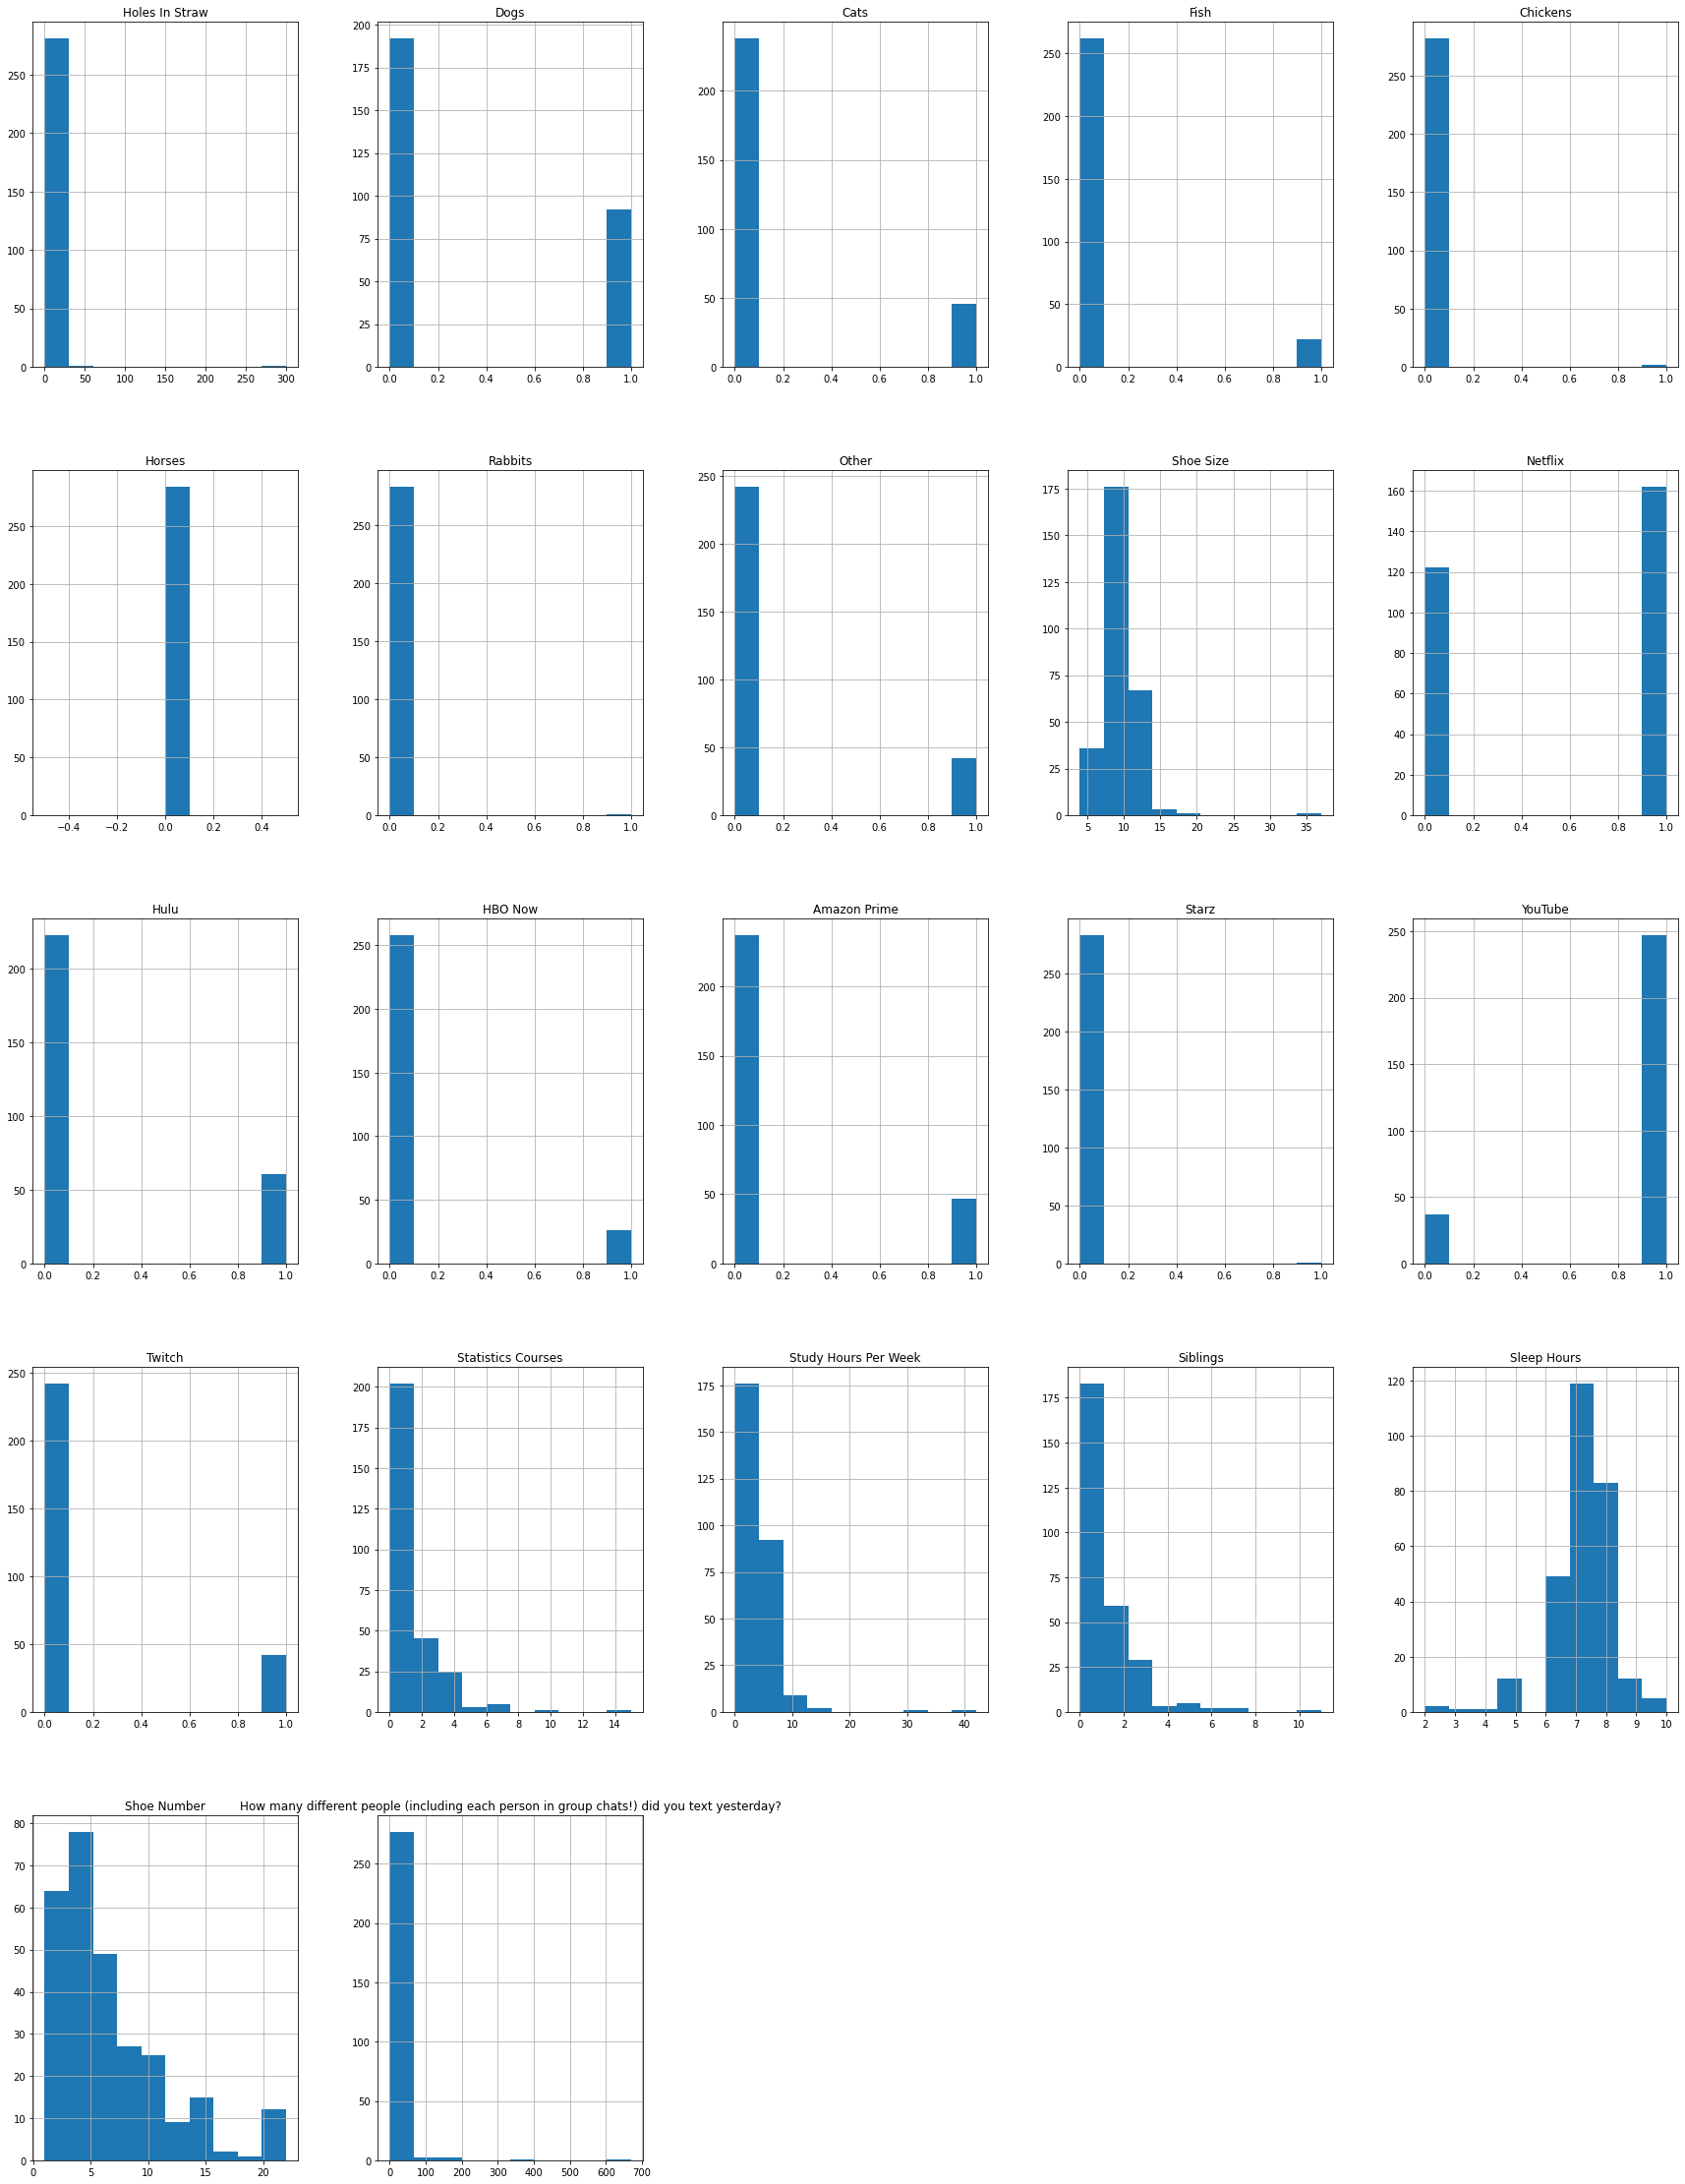

In [18]:
#plot the histogram for each column in df_nueric

df_numeric.hist(figsize=(30,40))

### Puzzle 2.4 Visualize "Year" 

To visualize the categorical data we will be using a bar plot.  However, we first need to convert our DataFrame with the categorical data into counts for each value.  To do this, we can use [`Series.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) on a column of data.

Let's see how this works.  Select just the `["Year"]` from `df_categorical` and apply `.value_counts()`.  Then, in the next cell, use that data to make a bar plot using `.plot.bar()`:

In [19]:
# Use `.value_counts()` to find the values counts of data about ["Year"]
value_counts = df_categorical["Year"].value_counts()
value_counts

Freshman     145
Sophomore     58
Junior        53
Senior        25
Other          3
Name: Year, dtype: int64

<AxesSubplot:>

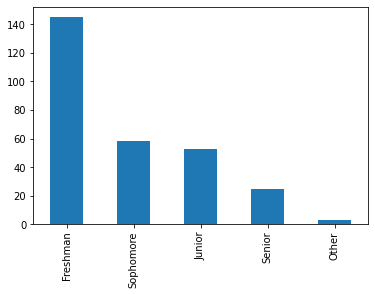

In [20]:
# Now, use `value_counts` to plot a bar chart:
value_counts.plot.bar()

### Puzzle 2.5 Visualize all Categorical Data

Finally, repeat this process for the columns in `df_categorical` using a for loop. You can use pyplot's `plt.show()` to display all the plots.

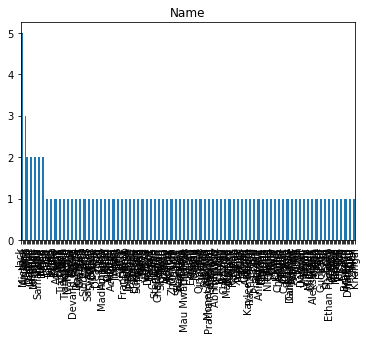

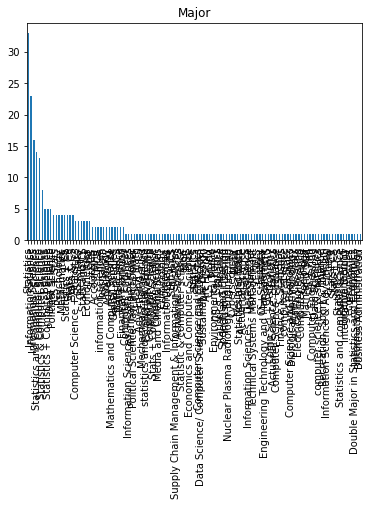

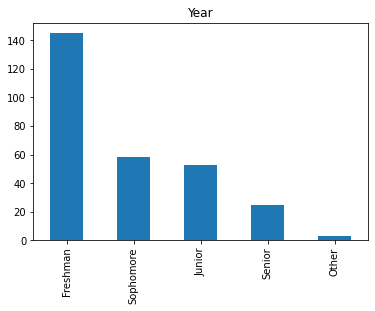

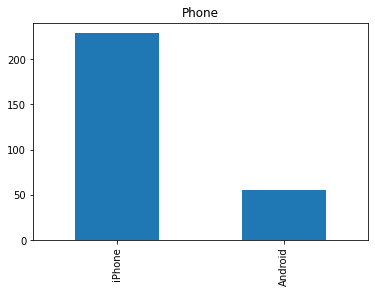

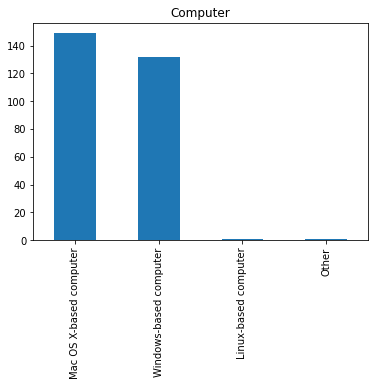

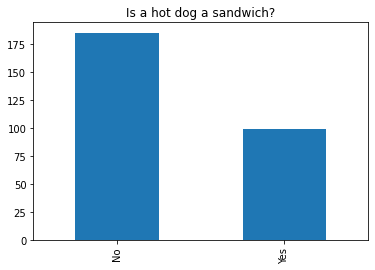

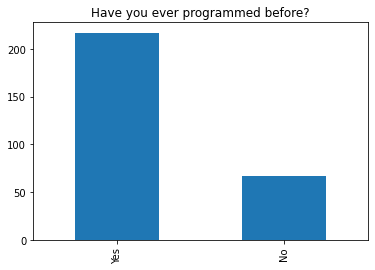

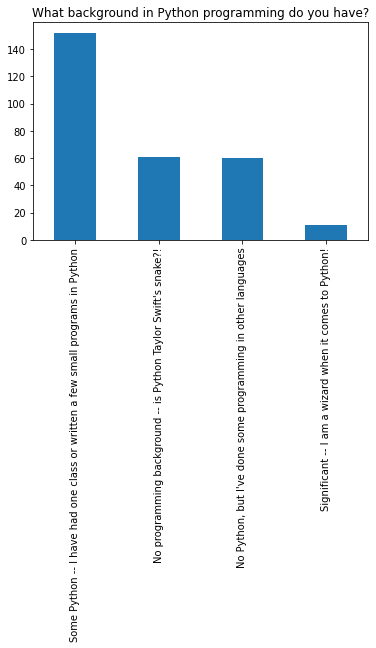

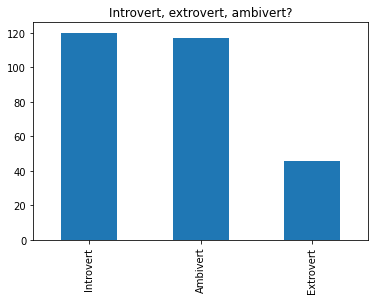

In [21]:
for column in categorical_cols:
    import matplotlib. pyplot as plt
    df_categorical[column].value_counts().plot.bar(title=column)
    plt.show()

### Puzzle 2.5 Handling Different Variable Types

❓ **Group Discussion and Individual Reflection** ❓ It's important to note that data represented with numbers aren't always categorized as quantitative (such as zip code or social security number). Looking at the graphs we generated, what are some examples of numeric data that might work better as categories or categorical data that could make sense to order? Can you think of other examples of data that is technically numbers, but would be categorized as categorical? Write down some highlights of your discussion below.

The Youtube and Twitch would probably work better as categorical data because we can use "yes" and "no" to see who uses these platforms. This will allows us to create a bar chart.

### Puzzle 2.6 Clean up the Data

Now that you know what the data looks like and what types of columns we are dealing with in this dataset, you must decided what to do with the NAs in the dataset. This decision is up to you as a data scientist!  There is no definite right answer. Functions like `fillna()`and `df.replace()` may be helpful. Use the `checkNAs()` function we made earlier to make sure all the NAs have been dealt with. Then, briefly explain what you did and why in the text box below.

**HINT:** (double-click this cell to see it): <span style="color:#ffffff00">One possible way to do this is to treat categorical and numeric NAs separately. For categorical columns, not responding coud be its own category indicated by some string like "Blank". For numeric columns, NAs could be represented by a central value like the mean, median, or an extreme value well outside the values of possible answers.</span>

In [29]:
df[categorical_cols] = df[categorical_cols].fillna("None")
df[numcols] = df[numcols].fillna(.1)

checkNAs(df)

This dataframe has no NAs


If there are NAs in categorical columns, the code puts in the string "None". If there are NAs in numerical columns, the code put in 0.1 because the data for numerical columns is usually 0 or 1. 

## Part 3 - Now, Time to Find Yourself

You cannot find people you are compatible with before finding yourself... literally! 

### Puzzle 3.1: Find Yourself

In the following cell, write the Python code to create a DataFrame with only yourself:

In [23]:
myrow = df[df.Name=="Rachael Gu"]
myrow

,Name,Major,Year,Phone,Computer,Holes In Straw,Dogs,Cats,Fish,Chickens,...,Twitch,Have you ever programmed before?,What background in Python programming do you have?,Statistics Courses,Study Hours Per Week,Siblings,Sleep Hours,Shoe Number,How many different people (including each person in group chats!) did you text yesterday?,"Introvert, extrovert, ambivert?"
10,Rachael Gu,computer science,Freshman,iPhone,Windows-based computer,1.0,0,0,0,0,...,0,No,Some Python -- I have had one class or written...,0.0,2.0,1,7.0,2.0,10.0,Introvert


In [24]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(myrow) == 1), "The row of yourself is not correctly set"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### DataFrame with one row vs. a Series

In `pandas`, there are three major data structures we will be using:

- A **DataFrame** is similar to an Excel sheet.  It contains zero or more rows and zero or more columns.  It can contain up to an unlimited number of rows and columns and is the basic data structure we will work with in Data Science Discovery

- A **GroupBy** is a grouping of rows within a DataFrame.  This "three dimensional data" requires us to use `agg` to reduce it back down to a **DataFrame**.

- A **Series** is a single row or column with zero or more values (columns).  You can think of a DataFrame as a collection of **Series** objects.  When you select a single column, you may have noticed that `pandas ` automatically outputs a **Series** object. When we deal with a single row, however, we will usually need to manually convert it to a **Series** instead of a **one row DataFrame**.

#### Converting between types

The `pandas` library makes it easy to convert between a **Series**, **DataFrame**, and **GroupBy**.

![image.png](img/datatypes.png)

Expressed as a list:

- From a **Series** (`row`) to a **DataFrame**
  * `row.to_frame()`
- From a **DataFrame** (`df`) to a **GroupBy**:
  * `df.groupby(by='columnName')` *-- (You know this already!)*

- From a **GroupBy** (`group`) to a **DataFrame**:
  * `df.agg( function )` *-- (You know this already!)*
- From a **DataFrame** (`df`) to a **Series**:
  * `df.squeeze()`, if the DataFrame has one row


  

### Puzzle 3.2: Transform your row into a Series
 
Using the correct function from above, transform the row containing only you from a one-row DataFrame into a Series.  Make sure the Series is named `myrow` (this will match up with code we provide you with later):

In [27]:
myrow = myrow.squeeze()

In [28]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(type(myrow) == pd.core.series.Series), "You did not successfully transform myrow's type into series"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 4 - Create a similarity function

The first step to finding who is the most similar to you is to create a **function** that will generate a similarity value for each person (or row). Unlike `sum`, `count`, or other functions, Python does not provide us a **function** that does this.  Instead, we need to write it ourselves. 😞

Using what you learned in lecture, let's write this function!

### Planning it out
Before starting to code, think about the **algorithm** you would like to use:

1. Go through each person.
2. Compare their responses to each question with yours.
3. Calculate and record a "similarity score". based on those comparisons.

Also, think about what **parameters** (input) and **return** (output) you want your function to have:

*Input:* - the row you want the similarity score for, the row you are comparing against (your row)

*Output:* - a numeric score representing the similarity between a row and the row being compared against

### Output Details
For each column, we want the score scale to be between 0 and 1, with 1 representing exact matches. So, if a row is the exact same as the one we're comparing it against it should have a score equal to the number of columns.

For a measure of ***closeness*** between values for the numerical data we'll use the following formula:

$1 -$ ( $|actual - desired|$ / $(maxColumnValue - minColumnValue)$ )

### Helpful tips
- Remember that you can loop through the columns of a dataframe
- Treat numeric data and categorical data differently
- Have a plan to test for if a column is all 0's


### Puzzle 4.1 Planning it out

Briefly describe any special cases you want to take into account or any weights or values you want to use for specific columns in the text box below. If there are none, state that instead. *(This part is completely up to you, just make sure it makes sensce and your code matches what you describe.)*

There are no special cases that I want to take into account. 

### Puzzle 4.2 Write the function

Now that everything has been thoroughly planned out, you're ready to write the function!  This is the most complicated part of the lab, so take your time :)

In [34]:
def similarity(row, myrow):
    score = 0
    
    for column in df:
        if column in df_numeric:
            if df[column].sum() !=0:
                dif = 1 - (abs(myrow[column] - row[column]) / (df[column].max() - df[column].min()))
                score = score + dif
            elif df[column].sum() == 0:
                score = score + 1
        elif column in df_categorical:
            if (myrow[column] == row[column]):
                score = score + 1
    return score

### Puzzle 4.3 Testing the function

Part of writing a function is making sure it does what you want it to. Test this function by checking how similar you are with yourself. Check to make sure the output is what you would expect. You can also use this space to test any special cases you would like to check.

In [35]:
# First test this function by checking how similar you are with yourself.
# The expected result will be a number equal to the number of columns you checked:
similarity(myrow, myrow)


31.0

## Part 5 - Using the Function

### The Tuple Datatype

Previously, we encountered several datatypes for storing multiple pieces of information: **DataFrame**, **List**, and most recently in `lab_simulation` **Dictionary**. You may remember changing these structures after creating them, like adding a new column to a **DataFrame** to store GPA values or appending to a **List** to gather simulation outputs. The **Tuple** datatype is similar to a **List**, but once you make it, you can't change it. This makes **Tuples** safer for passing arguments into functions and outputting more than one value from a function. A **Tuple** like a list with parentheses instead of square brackets: `(<thing1>,<thing2>,...)`. A single item tuple looks like this: `(<thing>,)`.

### Puzzle 5.1 Making an argument tuple

We will use `df.apply()` to apply our `similarity()` function to each row in our dataframe but we need to also pass `myrow` as a second argument to the function. To do this, we need to put that value into a one element tuple. Make this single item tuple below and name it `args`.

In [36]:
args = (myrow,)
args

(Name                                                                                                                                Rachael Gu
 Major                                                                                                                         computer science
 Year                                                                                                                                  Freshman
 Phone                                                                                                                                   iPhone
 Computer                                                                                                                Windows-based computer
 Holes In Straw                                                                                                                             1.0
 Dogs                                                                                                                                   


### Puzzle 5.2 - Get similarity for all rows

Use `df.apply()` to apply your `similarity` function to each row of the dataframe. Make sure your input is correct so that it will run the `similarity` function you defined earlier across all rows, comparing them with `myrow`. If you're not sure what arguments/inputs to use, the documentation for `apply()` can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html). Assign the new values to a new column in `df` and name the column `"similarity"`.

**HINT:** (double-click this cell to see it): 
<span style="color:#ffffff00"> Aside from the function name, you will also need the **args=** and **axis=** arguments</span>

In [37]:
df["similarity"] = df.apply(similarity, args = args, axis = 1)

In [38]:
## == TEST CASES for Puzzle 5 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(df.shape[1] >= 32), "You need to apply your similarity function to your dataframe"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Puzzle 5.3 - Find your twin!

Your last column in your DataFrame is a **metric** (a measurement) of how similar you are to everyone else in the class!

Use your **cheat sheet** (link: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to find how to sort a DataFrame where the most similar person is on top.  Store that sorted DataFrame in `df_twins`.

- You should be most similar to yourself (you will always match yourself)!  *If this is not the case, you did something wrong and should double-check all of your steps up to this point.*

In [39]:
df_twins = df.sort_values(by= "similarity", ascending= False)
df_twins

,Name,Major,Year,Phone,Computer,Holes In Straw,Dogs,Cats,Fish,Chickens,...,Have you ever programmed before?,What background in Python programming do you have?,Statistics Courses,Study Hours Per Week,Siblings,Sleep Hours,Shoe Number,How many different people (including each person in group chats!) did you text yesterday?,"Introvert, extrovert, ambivert?",similarity
10,Rachael Gu,computer science,Freshman,iPhone,Windows-based computer,1.0,0,0,0,0,...,No,Some Python -- I have had one class or written...,0.0,2.0,1,7.0,2.0,10.0,Introvert,31.000000
56,Hyun,Statistics and Computer Science,Sophomore,Android,Windows-based computer,1.0,0,0,0,0,...,No,Some Python -- I have had one class or written...,1.0,4.0,1,9.0,2.0,13.0,Introvert,26.585782
42,Jeffrey,Statistics&CS,Freshman,iPhone,Windows-based computer,1.0,0,1,0,0,...,Yes,Some Python -- I have had one class or written...,1.0,6.0,0,7.0,4.0,9.0,Introvert,26.548309
51,Heewon,Statistics + CS,Freshman,iPhone,Windows-based computer,1.0,0,0,0,0,...,Yes,Some Python -- I have had one class or written...,2.0,6.0,1,7.0,8.0,11.0,Ambivert,26.465660
172,Jacky,Business,Freshman,iPhone,Mac OS X-based computer,2.0,0,0,0,0,...,No,"No Python, but I've done some programming in o...",1.0,1.0,1,7.0,10.0,8.0,Introvert,26.431848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Alec,Political Science,Senior,Android,Windows-based computer,2.0,1,0,0,0,...,Yes,No programming background -- is Python Taylor ...,1.0,3.0,5,9.0,3.0,1.0,Extrovert,19.066793
35,Xuanye,Computer Science,Freshman,iPhone,Windows-based computer,1.0,1,1,1,1,...,Yes,Some Python -- I have had one class or written...,10.0,4.0,1,8.0,5.0,5.0,Ambivert,18.925356
145,Alex,Computer Science + Statistics,Senior,Android,Windows-based computer,2.0,1,0,0,0,...,Yes,Significant -- I am a wizard when it comes to ...,6.0,2.0,1,9.0,4.0,9.0,Ambivert,18.162941
19,Dianne,Information Science,Sophomore,iPhone,Mac OS X-based computer,2.0,1,1,1,0,...,No,No programming background -- is Python Taylor ...,2.0,9.0,2,7.0,12.0,670.0,Ambivert,18.058001


In [40]:
## == TEST CASES for Puzzle 6 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( df_twins.head(1).squeeze()["Name"] == myrow["Name"] ), "You must be most similar to yourself."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Finale!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!